In [2]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [3]:
# Copy the file path to reading 

file = Path(r'Source\adult.csv')

In [4]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Data Exploration and data cleaning

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
# explore the data
df.shape

(32561, 15)

In [7]:
# # Drop extraneous column
column_to_drop = ["fnlwgt","capital.gain","capital.loss","relationship","workclass","race"]
df.drop(columns=column_to_drop,inplace=True)


In [8]:
#  Replace "?" with NA
df.replace("?", pd.NA, inplace=True)

In [9]:
# Drop the rows with null values
df.dropna(inplace=True)
df.head()

,age,education,education.num,marital.status,occupation,sex,hours.per.week,native.country,income
1,82,HS-grad,9,Widowed,Exec-managerial,Female,18,United-States,<=50K
3,54,7th-8th,4,Divorced,Machine-op-inspct,Female,40,United-States,<=50K
4,41,Some-college,10,Separated,Prof-specialty,Female,40,United-States,<=50K
5,34,HS-grad,9,Divorced,Other-service,Female,45,United-States,<=50K
6,38,10th,6,Separated,Adm-clerical,Male,40,United-States,<=50K


In [10]:
# Verify dropped rows
df.shape

(30162, 9)

In [11]:
# Find the unique values of education
df["education"].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [12]:
# Drop education column since education and education.num has same measures
df = df.drop(columns=["education"])
df.head()

,age,education.num,marital.status,occupation,sex,hours.per.week,native.country,income
1,82,9,Widowed,Exec-managerial,Female,18,United-States,<=50K
3,54,4,Divorced,Machine-op-inspct,Female,40,United-States,<=50K
4,41,10,Separated,Prof-specialty,Female,40,United-States,<=50K
5,34,9,Divorced,Other-service,Female,45,United-States,<=50K
6,38,6,Separated,Adm-clerical,Male,40,United-States,<=50K


In [13]:
# find unique occupation
df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [14]:
#  convert to numerical data
df["occupation"]=df["occupation"].replace({'Exec-managerial':1, 'Machine-op-inspct':2, 'Prof-specialty':3,
       'Other-service':4, 'Adm-clerical':5, 'Transport-moving':6, 'Sales':7,
       'Craft-repair':8, 'Farming-fishing':8, 'Tech-support':8,
       'Protective-serv':9, 'Handlers-cleaners':10, 'Armed-Forces':11,
       'Priv-house-serv':12})

In [15]:
# marritial status unique values
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [16]:
#  Convert catergorical data to numerical value
df["marital.status"] = df["marital.status"].replace({"Widowed":1,"Divorced":2,"Separated":3,"Never-married":4,
                                                     "Married-civ-spouse":5,"Married-spouse-absent":6,"Married-AF-spouse":7})

In [17]:
#  Find out the different countries
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [18]:
# Replace value with labelencoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["native.country"] = label_encoder.fit_transform(df["native.country"])


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [19]:
# Changing sex column into numerical value
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df["sex"] = df["sex"].replace({"Female":0,"Male":1})

In [21]:
df.tail ()

,age,education.num,marital.status,occupation,sex,hours.per.week,native.country,income
32556,22,10,4,9,1,40,38,<=50K
32557,27,12,5,8,0,38,38,<=50K
32558,40,9,5,2,1,40,38,>50K
32559,58,9,1,5,0,40,38,<=50K
32560,22,9,4,5,1,20,38,<=50K


In [22]:
# find the unique values of education.num
df["education.num"].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 11,  2,  3, 12,  8,  5,  1],
      dtype=int64)

In [23]:
# convert income data into binary values
df_encoded = pd.get_dummies(df["income"])
df_final = pd.concat([df,df_encoded],axis = 1)
df_final.head()

,age,education.num,marital.status,occupation,sex,hours.per.week,native.country,income,<=50K,>50K
1,82,9,1,1,0,18,38,<=50K,True,False
3,54,4,2,2,0,40,38,<=50K,True,False
4,41,10,3,3,0,40,38,<=50K,True,False
5,34,9,2,4,0,45,38,<=50K,True,False
6,38,6,3,5,1,40,38,<=50K,True,False


ML Model - 


1. Logistic Regression


Split the data into X and Y and then into testing and training set

In [24]:
# Split the data into X(features) and y (income)

#  the y variable focus on the income
y = df["income"]

#  The x variable include all features except income
X = df.drop(columns=["income"])

In [25]:
#  Split into testing and training sets using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

Logistic Regression Model - pipeline

In [26]:
# Declare a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=42)

# Fit and save the logistic regression model using the training data
model = logistic_regression_model.fit(X_train,y_train)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Create the predicted value for the testing and training data

In [27]:
#  Generate training predictions
training_predictions = model.predict(X_train)

#  Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Print the confusion matrix for the training data

In [28]:
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train,training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

[[15758  1254]
 [ 3012  2597]]


Print a confusion matrix for the testing data

In [29]:
#  Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test,testing_predictions)

#  Print the confusion matrix for testing data
print(test_matrix)

[[5215  427]
 [1023  876]]


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Print the training classification report

In [30]:
# Print the training classification report
from sklearn.metrics import classification_report
training_report = classification_report(y_train,training_predictions)
print(training_report)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88     17012
        >50K       0.67      0.46      0.55      5609

    accuracy                           0.81     22621
   macro avg       0.76      0.69      0.71     22621
weighted avg       0.80      0.81      0.80     22621



Print the testing classification report

In [31]:
# Print the testing classification report
testing_report = classification_report(y_test,testing_predictions)
print(testing_report)

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      5642
        >50K       0.67      0.46      0.55      1899

    accuracy                           0.81      7541
   macro avg       0.75      0.69      0.71      7541
weighted avg       0.79      0.81      0.79      7541



c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

2. Random Forest Model

In [32]:
#  Creating StandardScaler instance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
#  Fitting standard scaler
X_scaler = scaler.fit(X_train)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [34]:
#  Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Fitting the Random forest model

In [35]:
#  Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500,random_state=78)

In [36]:
# fitting the model
rf_model = rf_model.fit(X_train_scaled,y_train)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Making Predictions Using the Random forest model

In [37]:
predictions = rf_model.predict(X_test_scaled)

Model Evaluation

In [38]:
#  Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,index = ["Actual 0","Actual 1"],columns=["Predicted 0","Predicted 1"])

#  Calculating the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,predictions)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [39]:
#  Displaying reslts
print("confusion matrix")
display(cm_df)
print(f"Accuracy score : {acc_score}")
print("Classification Report")
print(classification_report(y_test,predictions))

confusion matrix


,Predicted 0,Predicted 1
Actual 0,5033,609
Actual 1,846,1053


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Accuracy score : 0.807054767272245
Classification Report
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.87      5642
        >50K       0.63      0.55      0.59      1899

    accuracy                           0.81      7541
   macro avg       0.74      0.72      0.73      7541
weighted avg       0.80      0.81      0.80      7541



Feature Importance

In [40]:
#  Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
#  We can sort the features by their importance
sorted(zip(rf_model.feature_importances_,X.columns), reverse=True)

[(0.30638586356708886, 'age'),
 (0.18376000825849723, 'marital.status'),
 (0.17260960508957632, 'education.num'),
 (0.15560624628385433, 'hours.per.week'),
 (0.1227770568972007, 'occupation'),
 (0.031227428255341232, 'native.country'),
 (0.027633791648441333, 'sex')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

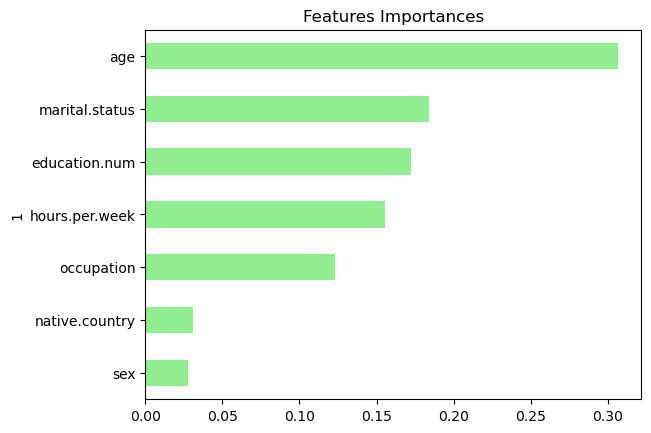

In [41]:
#  Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_,X.columns),reverse=True))
importances_df.set_index(importances_df[1],inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In both Logistic Regression Model and Random forest I got 0.81% accuracy. 

To improve the accuracy I drop 2 less important features which are native.country and sex

Improved  - Logistic Regression Model

In [42]:
# Use dropped dataframe to Split the data into X_1(features) and y (income)

#  the y variable focus on the income(no change from previous model)
y = df["income"]

#  The x_1 variable include all features except income,native.country and sex
X_1 = df.drop(columns=["income","native.country","sex"])

In [43]:
#  Split into testing and training sets using train_test_split
from sklearn.model_selection import train_test_split
X_1_train,X_1_test,y_train,y_test = train_test_split(X_1,y)

In [44]:
# Declare a logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_model_1 = LogisticRegression(random_state=42)

# Fit and save the logistic regression model using the training data
model_1 = logistic_regression_model_1.fit(X_1_train,y_train)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [45]:
#  Generate training predictions
training_predictions_1 = model_1.predict(X_1_train)

#  Generate testing predictions
testing_predictions_1 = logistic_regression_model_1.predict(X_1_test)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [46]:
# Create and save the confusion matrix for the training data
training_matrix_1 = confusion_matrix(y_train,training_predictions_1)

# Print the confusion matrix for the training data
print(training_matrix_1)

[[15711  1275]
 [ 3022  2613]]


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [47]:
#  Create and save the confusion matrix for the testing data
test_matrix_1 = confusion_matrix(y_test,testing_predictions_1)

#  Print the confusion matrix for testing data
print(test_matrix_1)

[[5246  422]
 [1044  829]]


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [48]:
# Print the training classification report
from sklearn.metrics import classification_report
training_report_1 = classification_report(y_train,training_predictions_1)
print(training_report_1)

c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88     16986
        >50K       0.67      0.46      0.55      5635

    accuracy                           0.81     22621
   macro avg       0.76      0.69      0.71     22621
weighted avg       0.80      0.81      0.80     22621



In [49]:
# Print the testing classification report
testing_report_1 = classification_report(y_test,testing_predictions_1)
print(testing_report_1)

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      5668
        >50K       0.66      0.44      0.53      1873

    accuracy                           0.81      7541
   macro avg       0.75      0.68      0.70      7541
weighted avg       0.79      0.81      0.79      7541



c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d